# Lab 0: introduction into image filtering using PyTorch
This is a notebook, which could help you with testing first lab assignment.
It contains utility functions for visualization, some test input for the functions you needs to implement,
and the output of the reference solution for the same test input.

template functions for the assignment contain a short description of what the function is supposed to do,
and produce an incorrect output, which is nevertheless in proper format: type and shape.

You are not allowed to use kornia or opencv or any other library functions, which are specifically designed
to perform the operations requested in assignment

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import torch
import kornia


def plot_torch(x, y, *kwargs):
    plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), *kwargs)
    return

def imshow_torch(tensor, *kwargs):
    plt.figure()
    plt.imshow(kornia.tensor_to_image(tensor), *kwargs)
    return
inp = torch.linspace(-12, 12, 101)

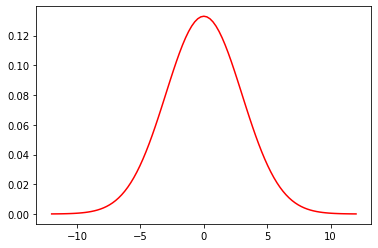

In [2]:
from imagefiltering import gaussian1d
plot_torch(inp, gaussian1d(inp, 3.0), 'r-')


## Reference example
```python
from lab0_reference.imagefiltering import gaussian1d
plot_torch(inp, gaussian1d(inp, 3.0), 'g-')

```

![image.png](imagefiltering_files/att_00000.png)

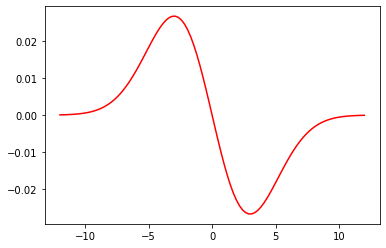

In [3]:
from imagefiltering import gaussian_deriv1d
plot_torch(inp, gaussian_deriv1d(inp, 3.0), 'r-')

## Reference example

```python
from lab0_reference.imagefiltering import gaussian_deriv1d
plot_torch(inp, gaussian_deriv1d(inp, 3.0), 'r-')
```

![image.png](imagefiltering_files/att_00001.png)

In [4]:
import ipykernel
ipykernel.__version__

'6.9.1'

torch.Size([3, 3])
torch.Size([1, 1, 32, 32])


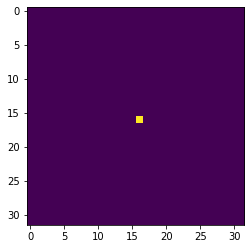

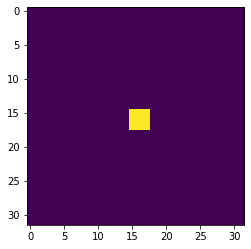

In [5]:
from imagefiltering import filter2d #, dgauss, gaussfilter, gaussderiv, gaussderiv2
inp = torch.zeros((1,1,32,32))
inp[...,16,16] = 1.
imshow_torch(inp)

kernel = torch.ones(3,3)
# inp = torch.zeros((1,2,16,16))
# inp[...,6:10,6:10] = 1.
# kernel = torch.ones(3,3)
# kernel [1,1] = -8

out = filter2d(inp, kernel)
# print(type(out))
print(kernel.shape)
print(out.shape)
imshow_torch(out)


## Reference example
```python
from imagefiltering import filter2d
inp = torch.zeros((1,1,32,32))
inp[...,16,16] = 1.
imshow_torch(inp)

kernel = torch.ones(3,3)

out = filter2d(inp, kernel)
imshow_torch(out)
```
![image.png](imagefiltering_files/att_00002.png)

/mnt/home.stud/kuntluka/MPV/assignment_0_3_correspondences_template/imagefiltering.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_kernel = torch.tensor(gaussian1d(k_ones, sigma=sigma))


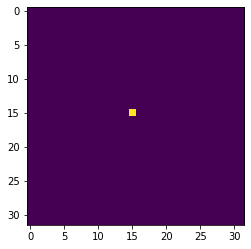

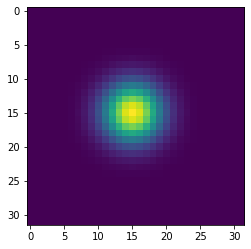

In [6]:
from imagefiltering import gaussian_filter2d
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = gaussian_filter2d(inp, sigma)
imshow_torch(out)


## Reference example

```python
from lab0_reference.imagefiltering import gaussian_filter2d
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = gaussian_filter2d(inp, sigma)
imshow_torch(out)
```
![image.png](imagefiltering_files/att_00003.png)

torch.Size([1, 1, 2, 32, 32])


/mnt/home.stud/kuntluka/MPV/assignment_0_3_correspondences_template/imagefiltering.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_kernel = torch.tensor(gaussian_deriv1d(grid, sigma=sigma))
/mnt/home.stud/kuntluka/MPV/assignment_0_3_correspondences_template/imagefiltering.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_kernel = torch.tensor(gaussian1d(grid, sigma=sigma)).T
/mnt/home.stud/kuntluka/MPV/assignment_0_3_correspondences_template/imagefiltering.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_kernel = torch.t

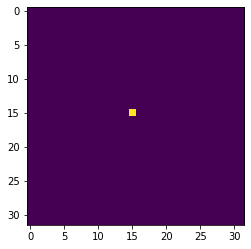

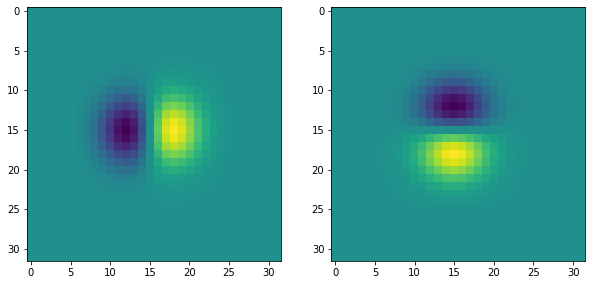

In [7]:
def imshow_torch_channels(tensor, dim = 1, *kwargs):
    num_ch = tensor.size(dim)
    fig=plt.figure(figsize=(num_ch*5,5))
    tensor_splitted = torch.split(tensor, 1, dim=dim)
    for i in range(num_ch):
        fig.add_subplot(1, num_ch, i+1)
        plt.imshow(kornia.tensor_to_image(tensor_splitted[i].squeeze(dim)), *kwargs)
    return

from imagefiltering import spatial_gradient_first_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_first_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)


## Reference example


```python 
from lab0_reference.imagefiltering import spatial_gradient_first_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_first_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)
```
![image.png](imagefiltering_files/att_00004.png)

torch.Size([1, 1, 3, 32, 32])


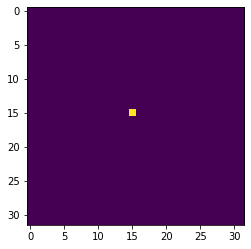

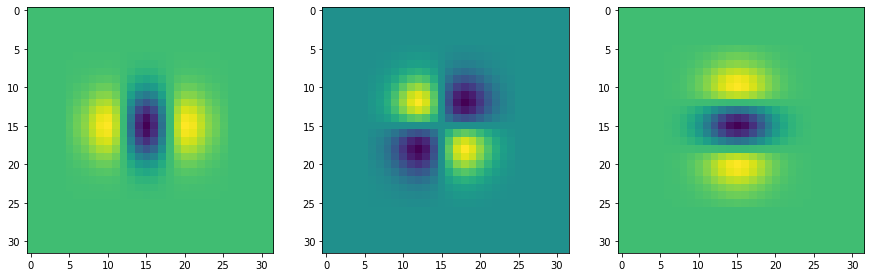

In [8]:
from imagefiltering import spatial_gradient_second_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_second_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)

## Reference example

```python
from lab0_reference.imagefiltering import spatial_gradient_second_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_second_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)
```
![image.png](imagefiltering_files/att_00005.png)

## Converting (center, unit_x, unit_y) into affine transform A
![image.png](imagefiltering_files/att_00006.png)

In [14]:
from imagefiltering import affine
# inp = torch.tensor([[3, 3.]]), torch.tensor([[6, 3.]]), torch.tensor([[3, 6.]])
inp = torch.tensor([[3, 3.],[2,2]]), torch.tensor([[6, 3.],[4,2]]), torch.tensor([[3, 6.],[2,4]])
A = affine(*inp)
print (A)
A.shape

torch.Size([2, 3, 3])
torch.Size([2, 1, 3])
tensor([[[3., 0., 3.],
         [0., 3., 3.],
         [0., 0., 1.]],

        [[2., 0., 2.],
         [0., 2., 2.],
         [0., 0., 1.]]])


torch.Size([2, 3, 3])

## Reference example

```python 
from lab0_reference.imagefiltering import affine
inp = 3, 3, 6, 3, 3, 6
A = affine(*inp)
print (A)
```

    tensor([[3., 0., 3.],
            [0., 3., 3.],
            [0., 0., 1.]])

## Affine patch extraction
![image.png](imagefiltering_files/att_00007.png)

In function `visualize_A` below, the line shows the Y (to the down) direction of the resulting patch. Remember, that typical image has left-hand coordinate system, where X increases to the right and Y increases to the south (down). Same is true for the extracted patches.

torch.Size([4, 3, 3])
torch.Size([4, 1, 3])
A = tensor([[[ 50., -30., 300.],
         [ 10., -50., 200.],
         [  0.,   0.,   1.]],

        [[ 50.,   0., 400.],
         [  0.,  60., 300.],
         [  0.,   0.,   1.]],

        [[ 50.,   0., 600.],
         [  0.,  50., 600.],
         [  0.,   0.,   1.]],

        [[ 50., -50., 100.],
         [ 50.,  50., 100.],
         [  0.,   0.,   1.]]])


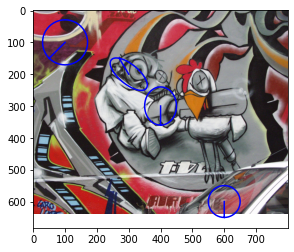

In [15]:
from imagefiltering import affine
import cv2
img1 = cv2.imread('graffiti.ppm')

def visualize_A(img, A, **kwargs):
    from kornia_moons.feature import visualize_LAF
    from kornia.feature import scale_laf
    LAF = scale_laf(A[None][:,:,:2], 2.0)
    visualize_LAF(img, LAF, **kwargs)
    return

timg1 = kornia.image_to_tensor(img1, False).float() / 255.
timg1 = kornia.color.bgr_to_rgb(timg1)

patch_centers = torch.tensor([[300., 200.], [400., 300], [600,600], [100,100]])
patch_unitx = torch.tensor([[350., 210.], [450., 300], [650,600], [150,150]])
patch_unity = torch.tensor([[270., 150.], [400., 360], [600,650], [50, 150]])

A = affine(patch_centers, patch_unitx, patch_unity)
print (f'A = {A}')
visualize_A(timg1, A, color = 'blue')

## Reference example

```python
from imagefiltering import extract_affine_patches, affine
import cv2
img1 = cv2.imread('graffiti.ppm')

def visualize_A(img, A, **kwargs):
    from kornia_moons.feature import visualize_LAF
    from kornia.feature import scale_laf
    LAF = scale_laf(A[None][:,:,:2], 2.0)
    visualize_LAF(img, LAF, **kwargs)
    return

timg1 = kornia.image_to_tensor(img1, False).float() / 255.
timg1 = kornia.color.bgr_to_rgb(timg1)

patch_centers = torch.tensor([[300., 200.], [400., 300], [600,600], [100,100]])
patch_unitx = torch.tensor([[350., 210.], [450., 300], [650,600], [150,150]])
patch_unity = torch.tensor([[270., 150.], [400., 360], [600,650], [50, 150]])

A = affine(patch_centers, patch_unitx, patch_unity)
print (f'A = {A}')
visualize_A(timg1, A, color = 'blue')
```

    A = tensor([[[ 50., -30., 300.],
         [ 10., -50., 200.],
         [  0.,   0.,   1.]],

        [[ 50.,   0., 400.],
         [  0.,  60., 300.],
         [  0.,   0.,   1.]],

        [[ 50.,   0., 600.],
         [  0.,  50., 600.],
         [  0.,   0.,   1.]],

        [[ 50., -50., 100.],
         [ 50.,  50., 100.],
         [  0.,   0.,   1.]]])

    patches.shape = torch.Size([4, 3, 32, 32])


![image.png](imagefiltering_files/lafs.png)

`extract_affine_patches` is function, which you should implement. `extract_antializased_affine_patches` is the function, which calls your function on the appropriate level of the scale pyramid, in order to perform basic level of [anti-aliasing](https://en.wikipedia.org/wiki/Anti-aliasing_filter). 
See in detail in post "[Patch extraction: devil in details](https://ducha-aiki.github.io/wide-baseline-stereo-blog/2020/07/22/patch-extraction.html)"

It is recommended to use `extract_antializased_affine_patches` in the tournames and in general to remember about aliasing effects in practice.

/home.stud/kuntluka/.conda/envs/mpv-gpu/lib/python3.8/site-packages/torch/nn/functional.py:3828: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


patches.shape = torch.Size([4, 3, 32, 32])


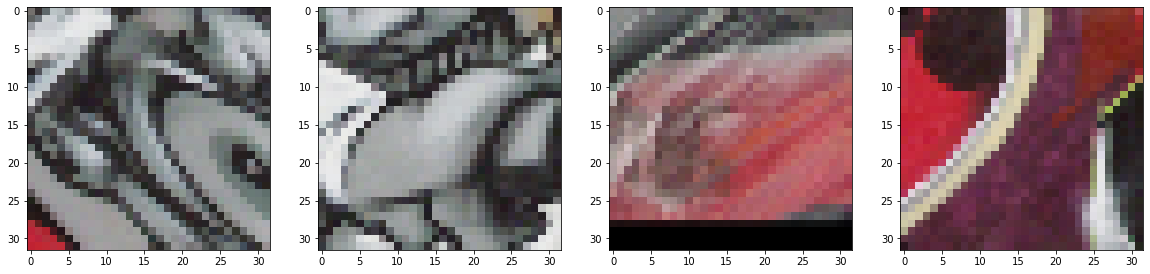

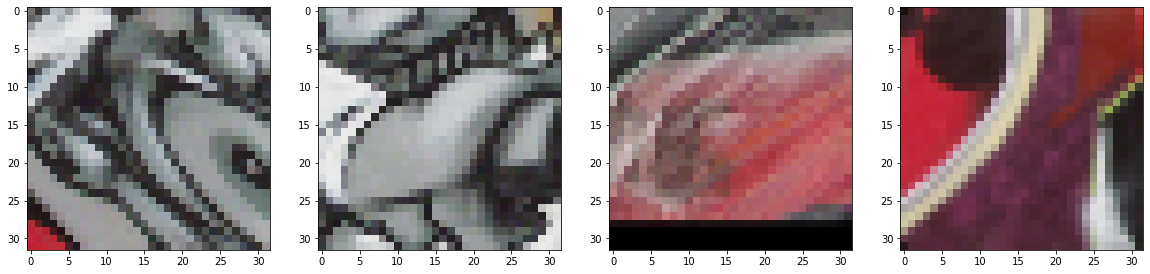

In [17]:
from imagefiltering import extract_affine_patches, extract_antializased_affine_patches

patches = extract_affine_patches(timg1,
                                 A, 
                                 torch.zeros(A.size(0)).long(),
                                 32, 1.0)

print (f'patches.shape = {patches.shape}')
imshow_torch_channels(patches, 0)

patches_AA = extract_antializased_affine_patches(timg1,
                                 A, 
                                 torch.zeros(A.size(0)).long(),
                                 32, 1.0)
imshow_torch_channels(patches_AA, 0)

## Reference example

```python
from imagefiltering import extract_affine_patches, extract_antializased_affine_patches

patches = extract_affine_patches(timg1,
                                 A, 
                                 torch.zeros(A.size(0)).long(),
                                 32, 1.0)

print (f'patches.shape = {patches.shape}')
imshow_torch_channels(patches, 0)

patches_AA = extract_antializased_affine_patches(timg1,
                                 A, 
                                 torch.zeros(A.size(0)).long(),
                                 32, 1.0)
imshow_torch_channels(patches_AA, 0)
```

![image.png](imagefiltering_files/patches.png)
![image.png](imagefiltering_files/patches_AA.png)

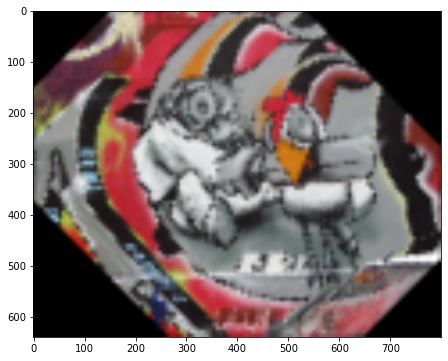

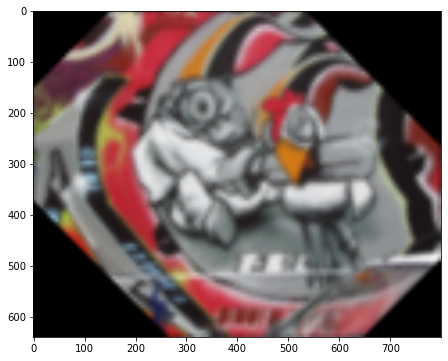

In [ ]:
from imagefiltering import affine
import cv2
import kornia as K
import torch
img1 = cv2.cvtColor(cv2.imread('graffiti.ppm'), cv2.COLOR_BGR2RGB).astype(np.float32)/255.


def there_and_back(img, blur=False, angle=45.):
    h,w = img.shape[:2]
    timg = K.image_to_tensor(img, False).float()
    if blur:
        timg = K.filters.gaussian_blur2d(timg, (15,15), (4.0, 4.0))
    img_rot = K.geometry.rotate(timg, torch.tensor(angle))
    img_down = K.geometry.resize(img_rot, (h//7, w//7))
    img_rot_back = K.geometry.rotate(img_down, torch.tensor(-angle))
    img_out = K.geometry.resize(img_rot_back, (h,w))
    return K.tensor_to_image(img_out)
img_rot = there_and_back(img1)
plt.figure(figsize=(8,6))
plt.imshow(img_rot)
plt.figure(figsize=(8,6))
plt.imshow(there_and_back(img1, True))

